# Часть 1. Универсальная теорема аппроксимации

# Импорты

### Настраиваем seabron и импортируем керас и все нужные слои для него

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


# Генерируем данные

### Будем использовать функцию xsin(x) для проверки теоремы

In [5]:
def x_sin(x):
    return x*np.sin(x)

x_sin(np.array([1,2,3]))

array([0.84147098, 1.81859485, 0.42336002])

In [6]:
np.linspace(0,5,10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [7]:
def create_data(data_start, data_end, n, f):
    x_train = np.linspace(data_start, data_end, n)
    y_train = f(x_train)

    return (x_train, y_train)

x_train, y_train = create_data(0,5,10, x_sin)

(x_train, y_train)

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([ 0.        ,  0.29300855,  0.99576911,  1.65901326,  1.76715568,
         0.98844998, -0.63522654, -2.64311427, -4.28585385, -4.79462137]))

# Сгенерируем наши данные

### Для начала возьмем небольшой кусок этой функции и рассмотрим поведение на нем

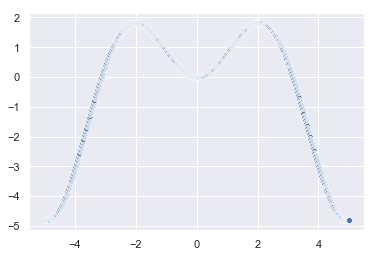

In [8]:
x_train, y_train = create_data(-5, 5, 1000, x_sin)
sns.scatterplot(x_train, y_train);

# Пробуем широкую модель

### Для начала построим модель с помощью API метода

In [9]:
def create_wide_model(units=1000):
    
    # API метод
    
    x = Input(shape=(1, ))    
    h = Dense(units, activation="sigmoid")(x)
    y = Dense(1, activation="linear")(h)
    model = Model(x, y)
    
    model.compile(optimizer=Adam(lr=0.01),
                 loss="mean_squared_error",
                 metrics=["mean_squared_error"])
    
    return model

In [10]:
wide_model = create_wide_model(100)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
wide_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [12]:
#обучаемся
wide_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
1000/1000 [==============================] - 0s 176us/step - loss: 4.8919 - mean_squared_error: 4.8919
Epoch 2/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.9686 - mean_squared_error: 4.9686
Epoch 3/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.9160 - mean_squared_error: 4.9160
Epoch 4/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.8233 - mean_squared_error: 4.8233
Epoch 5/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7837 - mean_squared_error: 4.7837
Epoch 6/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.6991 - mean_squared_error: 4.6991
Epoch 7/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.6558 - mean_squared_error: 4.6558
Epoch 8/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.5208 - mean_squared_error: 4.5208
Epoch 9/1000
1000/1000 [=============

1000/1000 [==============================] - 0s 8us/step - loss: 0.8846 - mean_squared_error: 0.8846
Epoch 70/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.8819 - mean_squared_error: 0.8819
Epoch 71/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8659 - mean_squared_error: 0.8659
Epoch 72/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8635 - mean_squared_error: 0.8635
Epoch 73/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8675 - mean_squared_error: 0.8675
Epoch 74/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8423 - mean_squared_error: 0.8423
Epoch 75/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.8370 - mean_squared_error: 0.8370
Epoch 76/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.8607 - mean_squared_error: 0.8607
Epoch 77/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.8217 - mean_s

1000/1000 [==============================] - 0s 7us/step - loss: 0.1252 - mean_squared_error: 0.1252
Epoch 140/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.1212 - mean_squared_error: 0.1212
Epoch 141/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 142/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 143/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 144/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 145/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 146/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 147/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.09

1000/1000 [==============================] - 0s 10us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 210/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 211/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 212/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 213/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 214/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 215/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 216/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 217/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.007

1000/1000 [==============================] - 0s 8us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 280/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 281/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 282/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 283/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 284/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 285/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 286/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 287/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0030

1000/1000 [==============================] - 0s 9us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 350/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 351/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 352/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 353/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 354/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 355/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 356/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 357/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.002

1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 420/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 421/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 422/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 423/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 424/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 425/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 426/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 427/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 

1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 490/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 491/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 492/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 493/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 494/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 495/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 496/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 497/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0015 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 560/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 561/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 562/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 563/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 564/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 565/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 566/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 567/1000
1000/1000 [==============================] - 0s 8us/step - l

1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 629/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 630/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 631/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 632/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 633/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 634/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 635/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 636/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 699/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 700/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 701/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0014 - mean_squared_error: 0.0014   
Epoch 702/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 703/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 704/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 705/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 706/1000
1000/1000 [==============================] - 0s 7us/step - l

1000/1000 [==============================] - 0s 10us/step - loss: 0.0011 - mean_squared_error: 0.0011   
Epoch 768/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 769/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 770/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 771/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 772/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 773/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 774/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 775/1000
1000/1000 [==============================] - 0s 7us/step - loss

1000/1000 [==============================] - 0s 8us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 837/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 838/1000
1000/1000 [==============================] - 0s 7us/step - loss: 8.8118e-04 - mean_squared_error: 8.8118e-04
Epoch 839/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 840/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 841/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 842/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 843/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 844/1000
1000/1000 [==============================] - 0s 7us/step - loss:

1000/1000 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 906/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 907/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 908/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 909/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.5050e-04 - mean_squared_error: 9.5050e-04
Epoch 910/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 911/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 912/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.8960e-04 - mean_squared_error: 9.8960e-04
Epoch 913/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 975/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 976/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 977/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.5739e-04 - mean_squared_error: 9.5739e-04
Epoch 978/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.3910e-04 - mean_squared_error: 8.3910e-04
Epoch 979/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 980/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 981/1000
1000/1000 [==============================] - 0s 7us/step - loss: 9.6672e-04 - mean_squared_error: 9.6672e-04
Epoch 982/1000
1000/1000 [=============================

### Предсказываем результаты

In [13]:
y_pred = wide_model.predict(x_train)

### Визуализируем данные

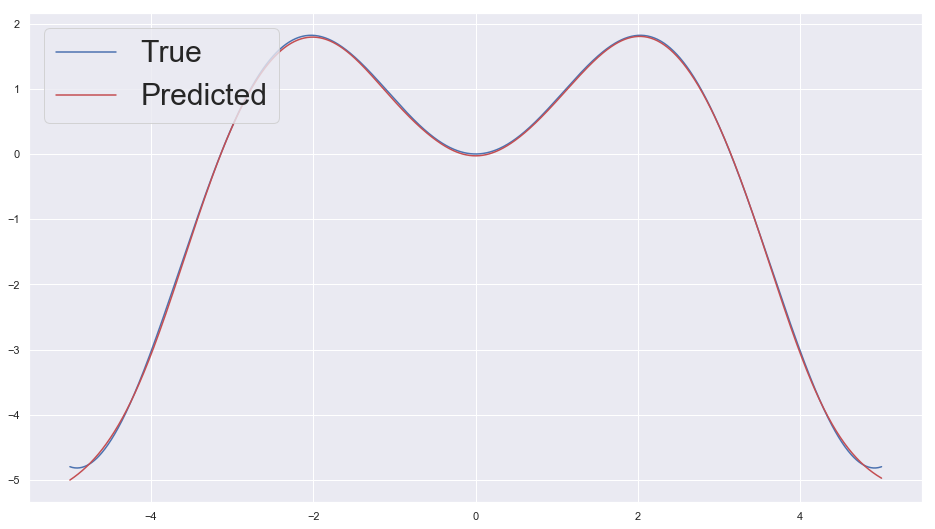

In [14]:
def visualize_predictions(x, y_true, model):
    y_pred = model.predict(x).reshape(y_true.shape)
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, c="b", label="True")
    ax.plot(x, y_pred, c="r", label="Predicted")
    ax.legend(loc=2, prop={'size': 30})
    
    plt.show()
    

visualize_predictions(x_train, y_train, wide_model)

## Собираем все воедино

Epoch 1/1000
1000/1000 [==============================] - 0s 151us/step - loss: 5.0589 - mean_squared_error: 5.0589
Epoch 2/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.9341 - mean_squared_error: 4.9341
Epoch 3/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.9114 - mean_squared_error: 4.9114
Epoch 4/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8634 - mean_squared_error: 4.8634
Epoch 5/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8340 - mean_squared_error: 4.8340
Epoch 6/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8287 - mean_squared_error: 4.8287
Epoch 7/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8056 - mean_squared_error: 4.8056
Epoch 8/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7961 - mean_squared_error: 4.7961
Epoch 9/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7823 -

1000/1000 [==============================] - 0s 10us/step - loss: 0.7705 - mean_squared_error: 0.7705
Epoch 73/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.7805 - mean_squared_error: 0.78 - 0s 10us/step - loss: 0.7617 - mean_squared_error: 0.7617
Epoch 74/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.7502 - mean_squared_error: 0.7502
Epoch 75/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.7372 - mean_squared_error: 0.7372
Epoch 76/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.7427 - mean_squared_error: 0.7427
Epoch 77/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.7356 - mean_squared_error: 0.7356
Epoch 78/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.7227 - mean_squared_error: 0.7227
Epoch 79/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.7087 - mean_squared_error: 0.7087
Epoch 80/1000
1000/1000 [=============

1000/1000 [==============================] - 0s 8us/step - loss: 0.3536 - mean_squared_error: 0.3536
Epoch 143/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.3506 - mean_squared_error: 0.3506
Epoch 144/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3520 - mean_squared_error: 0.3520
Epoch 145/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3478 - mean_squared_error: 0.3478
Epoch 146/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3479 - mean_squared_error: 0.3479
Epoch 147/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3564 - mean_squared_error: 0.3564
Epoch 148/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3539 - mean_squared_error: 0.3539
Epoch 149/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3512 - mean_squared_error: 0.3512
Epoch 150/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.3446 

1000/1000 [==============================] - 0s 9us/step - loss: 0.1804 - mean_squared_error: 0.1804
Epoch 213/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.1664 - mean_squared_error: 0.1664
Epoch 214/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.1512 - mean_squared_error: 0.1512
Epoch 215/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.1412 - mean_squared_error: 0.1412
Epoch 216/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.1277 - mean_squared_error: 0.1277
Epoch 217/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 218/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 219/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 220/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0832 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 283/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 284/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 285/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 286/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 287/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 288/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 289/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 290/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0030 

1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 353/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 354/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 355/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 356/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 357/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 358/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 359/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 360/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.002

1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 423/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 424/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 425/1000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 426/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 427/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 428/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 429/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 430/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0013 

1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 493/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 494/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 495/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 496/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.8658e-04 - mean_squared_error: 9.8658e-04
Epoch 497/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 498/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 499/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 500/1000
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 9us/step - loss: 8.6965e-04 - mean_squared_error: 8.6965e-04
Epoch 561/1000
1000/1000 [==============================] - 0s 9us/step - loss: 7.6799e-04 - mean_squared_error: 7.6799e-04
Epoch 562/1000
1000/1000 [==============================] - 0s 9us/step - loss: 8.1804e-04 - mean_squared_error: 8.1804e-04
Epoch 563/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.1610e-04 - mean_squared_error: 8.1610e-04
Epoch 564/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.6891e-04 - mean_squared_error: 8.6891e-04
Epoch 565/1000
1000/1000 [==============================] - 0s 8us/step - loss: 7.9011e-04 - mean_squared_error: 7.9011e-04
Epoch 566/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.5913e-04 - mean_squared_error: 9.5913e-04
Epoch 567/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 568/1000
1000/1000 [=

1000/1000 [==============================] - 0s 8us/step - loss: 9.2994e-04 - mean_squared_error: 9.2994e-04
Epoch 627/1000
1000/1000 [==============================] - 0s 8us/step - loss: 6.9555e-04 - mean_squared_error: 6.9555e-04
Epoch 628/1000
1000/1000 [==============================] - 0s 7us/step - loss: 6.5998e-04 - mean_squared_error: 6.5998e-04
Epoch 629/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 630/1000
1000/1000 [==============================] - 0s 8us/step - loss: 9.6314e-04 - mean_squared_error: 9.6314e-04
Epoch 631/1000
1000/1000 [==============================] - 0s 8us/step - loss: 7.8583e-04 - mean_squared_error: 7.8583e-04
Epoch 632/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.9822e-04 - mean_squared_error: 8.9822e-04
Epoch 633/1000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 634/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 8us/step - loss: 8.4805e-04 - mean_squared_error: 8.4805e-04
Epoch 693/1000
1000/1000 [==============================] - 0s 8us/step - loss: 7.9447e-04 - mean_squared_error: 7.9447e-04
Epoch 694/1000
1000/1000 [==============================] - 0s 8us/step - loss: 6.8361e-04 - mean_squared_error: 6.8361e-04
Epoch 695/1000
1000/1000 [==============================] - ETA: 0s - loss: 6.2557e-04 - mean_squared_error: 6.2557e- - 0s 8us/step - loss: 8.1569e-04 - mean_squared_error: 8.1569e-04
Epoch 696/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 697/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.4738e-04 - mean_squared_error: 8.4738e-04
Epoch 698/1000
1000/1000 [==============================] - 0s 9us/step - loss: 6.3592e-04 - mean_squared_error: 6.3592e-04
Epoch 699/1000
1000/1000 [==============================] - 0s 8us/step - loss: 7.0260e-04

1000/1000 [==============================] - 0s 8us/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 759/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.9287e-04 - mean_squared_error: 4.9287e-04
Epoch 760/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.9453e-04 - mean_squared_error: 4.9453e-04
Epoch 761/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.5752e-04 - mean_squared_error: 4.5752e-04
Epoch 762/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.5834e-04 - mean_squared_error: 6.5834e-04
Epoch 763/1000
1000/1000 [==============================] - 0s 9us/step - loss: 5.9840e-04 - mean_squared_error: 5.9840e-04
Epoch 764/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.8507e-04 - mean_squared_error: 5.8507e-04
Epoch 765/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.5688e-04 - mean_squared_error: 5.5688e-04
Epoch 766/1000
1000/1000 

1000/1000 [==============================] - 0s 9us/step - loss: 4.6705e-04 - mean_squared_error: 4.6705e-04
Epoch 825/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.7736e-04 - mean_squared_error: 4.7736e-04
Epoch 826/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.8001e-04 - mean_squared_error: 5.8001e-04
Epoch 827/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0011 - mean_squared_error: 0.0011   
Epoch 828/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.6677e-04 - mean_squared_error: 5.6677e-04
Epoch 829/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.7044e-04 - mean_squared_error: 4.7044e-04
Epoch 830/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.6041e-04 - mean_squared_error: 4.6041e-04
Epoch 831/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.5103e-04 - mean_squared_error: 5.5103e-04
Epoch 832/1000
1000/1000 [

1000/1000 [==============================] - 0s 8us/step - loss: 5.4791e-04 - mean_squared_error: 5.4791e-04
Epoch 891/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.1489e-04 - mean_squared_error: 5.1489e-04
Epoch 892/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.3741e-04 - mean_squared_error: 5.3741e-04
Epoch 893/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7822e-04 - mean_squared_error: 4.7822e-04
Epoch 894/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.1808e-04 - mean_squared_error: 4.1808e-04
Epoch 895/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.3469e-04 - mean_squared_error: 4.3469e-04
Epoch 896/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.8896e-04 - mean_squared_error: 4.8896e-04
Epoch 897/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.7340e-04 - mean_squared_error: 6.7340e-04
Epoch 898/1000
1000/10

1000/1000 [==============================] - 0s 9us/step - loss: 5.5624e-04 - mean_squared_error: 5.5624e-04
Epoch 957/1000
1000/1000 [==============================] - 0s 9us/step - loss: 4.7885e-04 - mean_squared_error: 4.7885e-04
Epoch 958/1000
1000/1000 [==============================] - 0s 9us/step - loss: 8.9390e-04 - mean_squared_error: 8.9390e-04
Epoch 959/1000
1000/1000 [==============================] - 0s 9us/step - loss: 7.1346e-04 - mean_squared_error: 7.1346e-04
Epoch 960/1000
1000/1000 [==============================] - 0s 8us/step - loss: 8.1253e-04 - mean_squared_error: 8.1253e-04
Epoch 961/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.5965e-04 - mean_squared_error: 7.5965e-04
Epoch 962/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.2498e-04 - mean_squared_error: 7.2498e-04
Epoch 963/1000
1000/1000 [==============================] - 0s 9us/step - loss: 5.0116e-04 - mean_squared_error: 5.0116e-04
Epoch 964/1000
1000/1

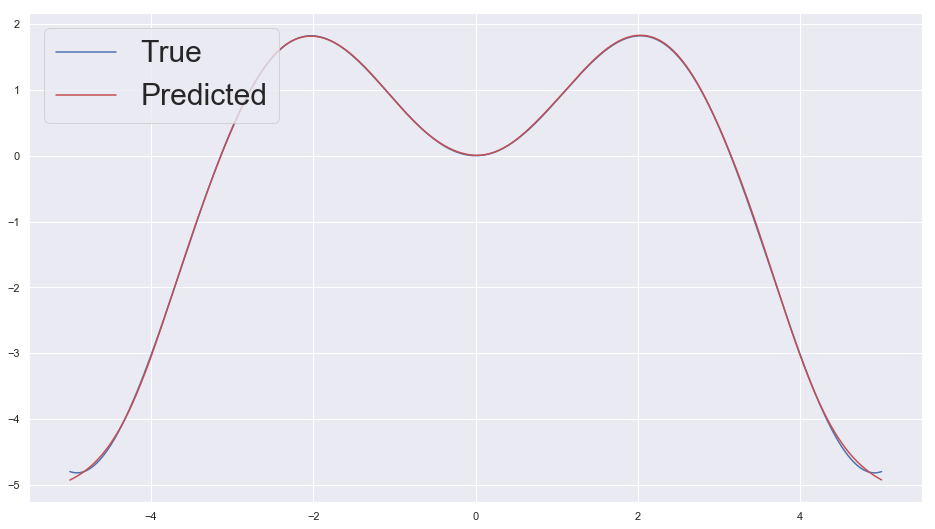

In [15]:
wide_model = create_wide_model(100)
wide_model.fit(x_train, y_train, epochs=1000, batch_size=100)
visualize_predictions(x_train, y_train, wide_model)

# Применим глубокую сеть

### Здесь построим модель с помощью Sequential()

In [16]:
def create_deep_model(units):
    
    # Sequential метод
    
    model = Sequential()
    model.add(Dense(units[0], activation='sigmoid', input_dim=1))
    
    for unit in units[1:]:
        model.add(Dense(unit, activation='sigmoid'))
    
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(lr=0.01),
                 loss="mse",
                 metrics=["mse"])
    
    return model

In [17]:
deep_model = create_deep_model([50,25,10])

In [18]:
deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 247us/step - loss: 5.0964 - mean_squared_error: 5.0964
Epoch 2/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8663 - mean_squared_error: 4.8663
Epoch 3/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8387 - mean_squared_error: 4.8387
Epoch 4/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.8043 - mean_squared_error: 4.8043
Epoch 5/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.7065 - mean_squared_error: 4.7065
Epoch 6/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.5223 - mean_squared_error: 4.5223
Epoch 7/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.1949 - mean_squared_error: 4.1949
Epoch 8/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.7452 - mean_squared_error: 3.7452
Epoch 9/1000
1000/1000 [==============================] - 0s 12us/step - loss: 

1000/1000 [==============================] - 0s 12us/step - loss: 0.2366 - mean_squared_error: 0.2366
Epoch 72/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2370 - mean_squared_error: 0.2370
Epoch 73/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.2365 - mean_squared_error: 0.2365
Epoch 74/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2359 - mean_squared_error: 0.2359
Epoch 75/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2354 - mean_squared_error: 0.2354
Epoch 76/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2354 - mean_squared_error: 0.2354
Epoch 77/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2356 - mean_squared_error: 0.2356
Epoch 78/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2351 - mean_squared_error: 0.2351
Epoch 79/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2346

1000/1000 [==============================] - 0s 11us/step - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 142/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 143/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 144/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 145/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 146/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 147/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 148/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 149/1000
1000/1000 [==============================] - 0s 11us/step - loss

1000/1000 [==============================] - 0s 11us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 212/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0012 - mean_squared_error: 0.0012   
Epoch 213/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 214/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0012 - mean_squared_error: 0.0012   
Epoch 215/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 216/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 217/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 218/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0011 - mean_squared_error: 0.0011   
Epoch 219/1000
1000/1000 [==============================] - 0s 11us/st

1000/1000 [==============================] - 0s 11us/step - loss: 7.0672e-04 - mean_squared_error: 7.0672e-04
Epoch 279/1000
1000/1000 [==============================] - 0s 12us/step - loss: 9.0833e-04 - mean_squared_error: 9.0833e-04
Epoch 280/1000
1000/1000 [==============================] - 0s 12us/step - loss: 8.2275e-04 - mean_squared_error: 8.2275e-04
Epoch 281/1000
1000/1000 [==============================] - 0s 12us/step - loss: 7.6684e-04 - mean_squared_error: 7.6684e-04
Epoch 282/1000
1000/1000 [==============================] - 0s 12us/step - loss: 6.1659e-04 - mean_squared_error: 6.1659e-04
Epoch 283/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.0010e-04 - mean_squared_error: 6.0010e-04
Epoch 284/1000
1000/1000 [==============================] - 0s 10us/step - loss: 8.8234e-04 - mean_squared_error: 8.8234e-04
Epoch 285/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.3757e-04 - mean_squared_error: 7.3757e-04
Epoch 286/1000


1000/1000 [==============================] - 0s 12us/step - loss: 5.4041e-04 - mean_squared_error: 5.4041e-04
Epoch 345/1000
1000/1000 [==============================] - 0s 14us/step - loss: 5.0966e-04 - mean_squared_error: 5.0966e-04
Epoch 346/1000
1000/1000 [==============================] - 0s 15us/step - loss: 9.1424e-04 - mean_squared_error: 9.1424e-04
Epoch 347/1000
1000/1000 [==============================] - 0s 13us/step - loss: 6.8685e-04 - mean_squared_error: 6.8685e-04
Epoch 348/1000
1000/1000 [==============================] - 0s 12us/step - loss: 4.4088e-04 - mean_squared_error: 4.4088e-04
Epoch 349/1000
1000/1000 [==============================] - 0s 12us/step - loss: 4.1045e-04 - mean_squared_error: 4.1045e-04
Epoch 350/1000
1000/1000 [==============================] - 0s 12us/step - loss: 7.0873e-04 - mean_squared_error: 7.0873e-04
Epoch 351/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.9593e-04 - mean_squared_error: 5.9593e-04
Epoch 352/1000


1000/1000 [==============================] - 0s 10us/step - loss: 6.3293e-04 - mean_squared_error: 6.3293e-04
Epoch 411/1000
1000/1000 [==============================] - 0s 11us/step - loss: 7.1197e-04 - mean_squared_error: 7.1197e-04
Epoch 412/1000
1000/1000 [==============================] - 0s 11us/step - loss: 4.0011e-04 - mean_squared_error: 4.0011e-04
Epoch 413/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.5956e-04 - mean_squared_error: 4.5956e-04
Epoch 414/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.4843e-04 - mean_squared_error: 4.4843e-04
Epoch 415/1000
1000/1000 [==============================] - 0s 11us/step - loss: 4.4757e-04 - mean_squared_error: 4.4757e-04
Epoch 416/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.6213e-04 - mean_squared_error: 5.6213e-04
Epoch 417/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.2668e-04 - mean_squared_error: 5.2668e-04
Epoch 418/1000


1000/1000 [==============================] - 0s 10us/step - loss: 3.3027e-04 - mean_squared_error: 3.3027e-04
Epoch 477/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.0077e-04 - mean_squared_error: 5.0077e-04
Epoch 478/1000
1000/1000 [==============================] - 0s 11us/step - loss: 3.5976e-04 - mean_squared_error: 3.5976e-04
Epoch 479/1000
1000/1000 [==============================] - 0s 11us/step - loss: 3.1249e-04 - mean_squared_error: 3.1249e-04
Epoch 480/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.3866e-04 - mean_squared_error: 3.3866e-04
Epoch 481/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.3679e-04 - mean_squared_error: 4.3679e-04
Epoch 482/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.3721e-04 - mean_squared_error: 5.3721e-04
Epoch 483/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.9165e-04 - mean_squared_error: 7.9165e-04
Epoch 484/1000


1000/1000 [==============================] - 0s 10us/step - loss: 3.6194e-04 - mean_squared_error: 3.6194e-04
Epoch 543/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.3450e-04 - mean_squared_error: 3.3450e-04
Epoch 544/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.4865e-04 - mean_squared_error: 3.4865e-04
Epoch 545/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.9085e-04 - mean_squared_error: 3.9085e-04
Epoch 546/1000
1000/1000 [==============================] - 0s 10us/step - loss: 7.7895e-04 - mean_squared_error: 7.7895e-04
Epoch 547/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 548/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.6541e-04 - mean_squared_error: 6.6541e-04
Epoch 549/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.4923e-04 - mean_squared_error: 5.4923e-04
Epoch 550/1000
1000/

1000/1000 [==============================] - 0s 16us/step - loss: 2.9840e-04 - mean_squared_error: 2.9840e-04
Epoch 609/1000
1000/1000 [==============================] - 0s 13us/step - loss: 4.5505e-04 - mean_squared_error: 4.5505e-04
Epoch 610/1000
1000/1000 [==============================] - 0s 13us/step - loss: 3.8088e-04 - mean_squared_error: 3.8088e-04
Epoch 611/1000
1000/1000 [==============================] - 0s 12us/step - loss: 2.8453e-04 - mean_squared_error: 2.8453e-04
Epoch 612/1000
1000/1000 [==============================] - 0s 12us/step - loss: 2.9330e-04 - mean_squared_error: 2.9330e-04
Epoch 613/1000
1000/1000 [==============================] - 0s 12us/step - loss: 3.4260e-04 - mean_squared_error: 3.4260e-04
Epoch 614/1000
1000/1000 [==============================] - 0s 12us/step - loss: 3.4533e-04 - mean_squared_error: 3.4533e-04
Epoch 615/1000
1000/1000 [==============================] - 0s 12us/step - loss: 3.8654e-04 - mean_squared_error: 3.8654e-04
Epoch 616/1000


1000/1000 [==============================] - 0s 10us/step - loss: 4.1976e-04 - mean_squared_error: 4.1976e-04
Epoch 674/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.4734e-04 - mean_squared_error: 5.4734e-04
Epoch 675/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.9220e-04 - mean_squared_error: 6.9220e-04
Epoch 676/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0017 - mean_squared_error: 0.0017   
Epoch 677/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 678/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0016 - mean_squared_error: 0.0016   
Epoch 679/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0015 - mean_squared_error: 0.0015   
Epoch 680/1000
1000/1000 [==============================] - 0s 11us/step - loss: 7.2574e-04 - mean_squared_error: 7.2574e-04
Epoch 681/1000
1000/1000 [============

1000/1000 [==============================] - 0s 10us/step - loss: 2.8282e-04 - mean_squared_error: 2.8282e-04
Epoch 740/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.2235e-04 - mean_squared_error: 2.2235e-04
Epoch 741/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.7665e-04 - mean_squared_error: 2.7665e-04
Epoch 742/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.2664e-04 - mean_squared_error: 2.2664e-04
Epoch 743/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.4537e-04 - mean_squared_error: 2.4537e-04
Epoch 744/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.6831e-04 - mean_squared_error: 2.6831e-04
Epoch 745/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.0056e-04 - mean_squared_error: 2.0056e-04
Epoch 746/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.5295e-04 - mean_squared_error: 1.5295e-04
Epoch 747/1000


1000/1000 [==============================] - 0s 10us/step - loss: 8.2284e-04 - mean_squared_error: 8.2284e-04
Epoch 806/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.0233e-04 - mean_squared_error: 6.0233e-04
Epoch 807/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.7589e-04 - mean_squared_error: 5.7589e-04
Epoch 808/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.8117e-04 - mean_squared_error: 3.8117e-04
Epoch 809/1000
1000/1000 [==============================] - 0s 10us/step - loss: 4.5880e-04 - mean_squared_error: 4.5880e-04
Epoch 810/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.1970e-04 - mean_squared_error: 3.1970e-04
Epoch 811/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.3645e-04 - mean_squared_error: 2.3645e-04
Epoch 812/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.8189e-04 - mean_squared_error: 2.8189e-04
Epoch 813/1000


1000/1000 [==============================] - 0s 11us/step - loss: 4.0452e-04 - mean_squared_error: 4.0452e-04
Epoch 872/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.9987e-04 - mean_squared_error: 2.9987e-04
Epoch 873/1000
1000/1000 [==============================] - 0s 10us/step - loss: 5.3954e-04 - mean_squared_error: 5.3954e-04
Epoch 874/1000
1000/1000 [==============================] - 0s 10us/step - loss: 6.9846e-04 - mean_squared_error: 6.9846e-04
Epoch 875/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.9801e-04 - mean_squared_error: 2.9801e-04
Epoch 876/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.0313e-04 - mean_squared_error: 2.0313e-04
Epoch 877/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.9612e-04 - mean_squared_error: 1.9612e-04
Epoch 878/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.0295e-04 - mean_squared_error: 2.0295e-04
Epoch 879/1000


1000/1000 [==============================] - 0s 12us/step - loss: 7.5814e-04 - mean_squared_error: 7.5814e-04
Epoch 937/1000
1000/1000 [==============================] - 0s 11us/step - loss: 6.6796e-04 - mean_squared_error: 6.6796e-04
Epoch 938/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.4539e-04 - mean_squared_error: 5.4539e-04
Epoch 939/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.0432e-04 - mean_squared_error: 3.0432e-04
Epoch 940/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.6649e-04 - mean_squared_error: 3.6649e-04
Epoch 941/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.9459e-04 - mean_squared_error: 3.9459e-04
Epoch 942/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1189e-04 - mean_squared_error: 2.1189e-04
Epoch 943/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.4212e-04 - mean_squared_error: 3.4212e-04
Epoch 944/1000


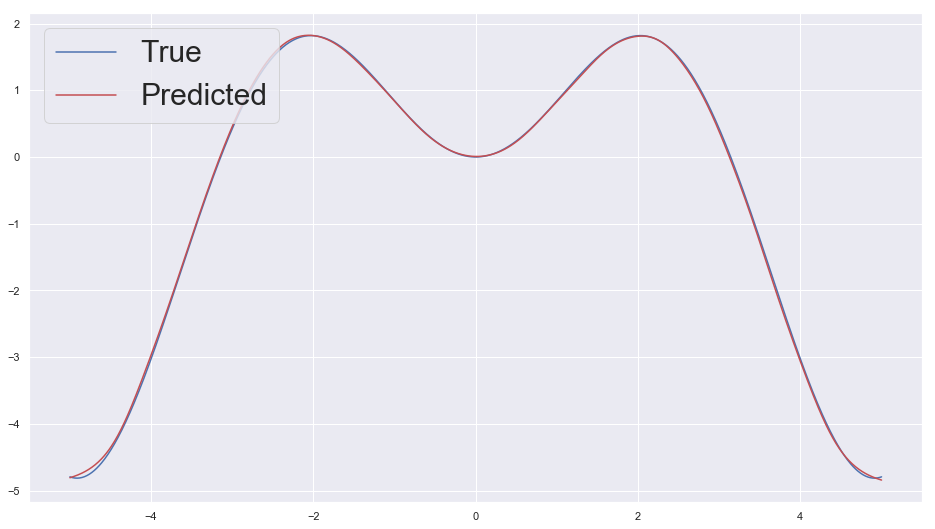

In [19]:
visualize_predictions(x_train, y_train, deep_model)

# Берем функцию посложнее

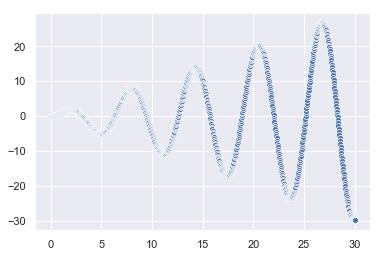

In [20]:
x_train, y_train = create_data(0, 30, 1000, x_sin)
sns.scatterplot(x_train, y_train);

# Широкая модель на сложной функции

In [21]:
wide_model = create_wide_model(1200)
wide_history = wide_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 205us/step - loss: 166.8262 - mean_squared_error: 166.8262
Epoch 2/1000
1000/1000 [==============================] - 0s 12us/step - loss: 156.4075 - mean_squared_error: 156.4075
Epoch 3/1000
1000/1000 [==============================] - 0s 11us/step - loss: 154.3273 - mean_squared_error: 154.3273
Epoch 4/1000
1000/1000 [==============================] - 0s 12us/step - loss: 153.2362 - mean_squared_error: 153.2362
Epoch 5/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.7829 - mean_squared_error: 152.7829
Epoch 6/1000
1000/1000 [==============================] - 0s 12us/step - loss: 153.2904 - mean_squared_error: 153.2904
Epoch 7/1000
1000/1000 [==============================] - 0s 13us/step - loss: 153.6780 - mean_squared_error: 153.6780
Epoch 8/1000
1000/1000 [==============================] - 0s 14us/step - loss: 154.3987 - mean_squared_error: 154.3987
Epoch 9/1000
1000/1000 [=======================

1000/1000 [==============================] - 0s 11us/step - loss: 152.8398 - mean_squared_error: 152.8398
Epoch 70/1000
1000/1000 [==============================] - 0s 12us/step - loss: 153.7819 - mean_squared_error: 153.7819
Epoch 71/1000
1000/1000 [==============================] - 0s 13us/step - loss: 153.6424 - mean_squared_error: 153.6424
Epoch 72/1000
1000/1000 [==============================] - 0s 13us/step - loss: 153.0024 - mean_squared_error: 153.0024
Epoch 73/1000
1000/1000 [==============================] - 0s 13us/step - loss: 152.7515 - mean_squared_error: 152.7515
Epoch 74/1000
1000/1000 [==============================] - 0s 14us/step - loss: 152.7127 - mean_squared_error: 152.7127
Epoch 75/1000
1000/1000 [==============================] - 0s 13us/step - loss: 152.7444 - mean_squared_error: 152.7444
Epoch 76/1000
1000/1000 [==============================] - 0s 13us/step - loss: 152.7205 - mean_squared_error: 152.7205
Epoch 77/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s 11us/step - loss: 152.8605 - mean_squared_error: 152.8605
Epoch 138/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.5490 - mean_squared_error: 152.5490
Epoch 139/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.8518 - mean_squared_error: 152.8518
Epoch 140/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.5088 - mean_squared_error: 152.5088
Epoch 141/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.5435 - mean_squared_error: 152.5435
Epoch 142/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.3040 - mean_squared_error: 152.3040
Epoch 143/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.6513 - mean_squared_error: 152.6513
Epoch 144/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.7898 - mean_squared_error: 152.7898
Epoch 145/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 12us/step - loss: 152.1806 - mean_squared_error: 152.1806
Epoch 205/1000
1000/1000 [==============================] - 0s 13us/step - loss: 152.0252 - mean_squared_error: 152.0252
Epoch 206/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.9373 - mean_squared_error: 151.9373
Epoch 207/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.0501 - mean_squared_error: 152.0501
Epoch 208/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.3400 - mean_squared_error: 152.3400
Epoch 209/1000
1000/1000 [==============================] - 0s 14us/step - loss: 152.5225 - mean_squared_error: 152.5225
Epoch 210/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.5732 - mean_squared_error: 152.5732
Epoch 211/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.1450 - mean_squared_error: 152.1450
Epoch 212/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 151.9035 - mean_squared_error: 151.9035
Epoch 272/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.9973 - mean_squared_error: 151.9973
Epoch 273/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.9428 - mean_squared_error: 151.9428
Epoch 274/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.1919 - mean_squared_error: 152.1919
Epoch 275/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.9455 - mean_squared_error: 151.9455
Epoch 276/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.2015 - mean_squared_error: 152.2015
Epoch 277/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.2260 - mean_squared_error: 152.2260
Epoch 278/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.3535 - mean_squared_error: 152.3535
Epoch 279/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 151.8352 - mean_squared_error: 151.8352
Epoch 339/1000
1000/1000 [==============================] - 0s 12us/step - loss: 152.0417 - mean_squared_error: 152.0417
Epoch 340/1000
1000/1000 [==============================] - 0s 11us/step - loss: 152.1480 - mean_squared_error: 152.1480
Epoch 341/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.7940 - mean_squared_error: 151.7940
Epoch 342/1000
1000/1000 [==============================] - 0s 13us/step - loss: 151.8152 - mean_squared_error: 151.8152
Epoch 343/1000
1000/1000 [==============================] - 0s 15us/step - loss: 151.8253 - mean_squared_error: 151.8253
Epoch 344/1000
1000/1000 [==============================] - 0s 14us/step - loss: 151.8526 - mean_squared_error: 151.8526
Epoch 345/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.7971 - mean_squared_error: 151.7971
Epoch 346/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 151.7822 - mean_squared_error: 151.7822
Epoch 406/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6709 - mean_squared_error: 151.6709
Epoch 407/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6738 - mean_squared_error: 151.6738
Epoch 408/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.7354 - mean_squared_error: 151.7354
Epoch 409/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.7467 - mean_squared_error: 151.7467
Epoch 410/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.6707 - mean_squared_error: 151.6707
Epoch 411/1000
1000/1000 [==============================] - 0s 13us/step - loss: 152.2898 - mean_squared_error: 152.2898
Epoch 412/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.7604 - mean_squared_error: 151.7604
Epoch 413/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 12us/step - loss: 151.5573 - mean_squared_error: 151.5573
Epoch 473/1000
1000/1000 [==============================] - 0s 14us/step - loss: 151.9002 - mean_squared_error: 151.9002
Epoch 474/1000
1000/1000 [==============================] - 0s 13us/step - loss: 151.4953 - mean_squared_error: 151.4953
Epoch 475/1000
1000/1000 [==============================] - 0s 14us/step - loss: 151.5454 - mean_squared_error: 151.5454
Epoch 476/1000
1000/1000 [==============================] - 0s 17us/step - loss: 151.5802 - mean_squared_error: 151.5802
Epoch 477/1000
1000/1000 [==============================] - 0s 18us/step - loss: 151.4994 - mean_squared_error: 151.4994
Epoch 478/1000
1000/1000 [==============================] - 0s 15us/step - loss: 151.4920 - mean_squared_error: 151.4920
Epoch 479/1000
1000/1000 [==============================] - 0s 13us/step - loss: 151.8916 - mean_squared_error: 151.8916
Epoch 480/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 151.2060 - mean_squared_error: 151.2060
Epoch 540/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.4230 - mean_squared_error: 151.4230
Epoch 541/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.2680 - mean_squared_error: 151.2680
Epoch 542/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.2298 - mean_squared_error: 151.2298
Epoch 543/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.1972 - mean_squared_error: 151.1972
Epoch 544/1000
1000/1000 [==============================] - 0s 14us/step - loss: 151.3097 - mean_squared_error: 151.3097
Epoch 545/1000
1000/1000 [==============================] - 0s 12us/step - loss: 151.2022 - mean_squared_error: 151.2022
Epoch 546/1000
1000/1000 [==============================] - 0s 13us/step - loss: 151.2090 - mean_squared_error: 151.2090
Epoch 547/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 11us/step - loss: 150.7986 - mean_squared_error: 150.7986
Epoch 607/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.0306 - mean_squared_error: 151.0306
Epoch 608/1000
1000/1000 [==============================] - 0s 13us/step - loss: 150.9377 - mean_squared_error: 150.9377
Epoch 609/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.8255 - mean_squared_error: 150.8255
Epoch 610/1000
1000/1000 [==============================] - 0s 14us/step - loss: 150.7995 - mean_squared_error: 150.7995
Epoch 611/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.7618 - mean_squared_error: 150.7618
Epoch 612/1000
1000/1000 [==============================] - 0s 14us/step - loss: 150.7330 - mean_squared_error: 150.7330
Epoch 613/1000
1000/1000 [==============================] - 0s 13us/step - loss: 150.7548 - mean_squared_error: 150.7548
Epoch 614/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 13us/step - loss: 150.4421 - mean_squared_error: 150.4421
Epoch 674/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.3912 - mean_squared_error: 150.3912
Epoch 675/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.6407 - mean_squared_error: 150.6407
Epoch 676/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.4381 - mean_squared_error: 150.4381
Epoch 677/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.3404 - mean_squared_error: 150.3404
Epoch 678/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.3011 - mean_squared_error: 150.3011
Epoch 679/1000
1000/1000 [==============================] - 0s 12us/step - loss: 150.4097 - mean_squared_error: 150.4097
Epoch 680/1000
1000/1000 [==============================] - 0s 13us/step - loss: 150.3522 - mean_squared_error: 150.3522
Epoch 681/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 13us/step - loss: 149.8557 - mean_squared_error: 149.8557
Epoch 741/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.9584 - mean_squared_error: 149.9584
Epoch 742/1000
1000/1000 [==============================] - 0s 13us/step - loss: 149.9186 - mean_squared_error: 149.9186
Epoch 743/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.8714 - mean_squared_error: 149.8714
Epoch 744/1000
1000/1000 [==============================] - 0s 13us/step - loss: 149.8731 - mean_squared_error: 149.8731
Epoch 745/1000
1000/1000 [==============================] - 0s 12us/step - loss: 149.8309 - mean_squared_error: 149.8309
Epoch 746/1000
1000/1000 [==============================] - 0s 13us/step - loss: 149.9051 - mean_squared_error: 149.9051
Epoch 747/1000
1000/1000 [==============================] - 0s 13us/step - loss: 150.2452 - mean_squared_error: 150.2452
Epoch 748/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 12us/step - loss: 149.2213 - mean_squared_error: 149.2213
Epoch 808/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.5427 - mean_squared_error: 149.5427
Epoch 809/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.1135 - mean_squared_error: 149.1135
Epoch 810/1000
1000/1000 [==============================] - 0s 11us/step - loss: 150.1578 - mean_squared_error: 150.1578
Epoch 811/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.1164 - mean_squared_error: 149.1164
Epoch 812/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.1411 - mean_squared_error: 149.1411
Epoch 813/1000
1000/1000 [==============================] - 0s 10us/step - loss: 149.1309 - mean_squared_error: 149.1309
Epoch 814/1000
1000/1000 [==============================] - 0s 11us/step - loss: 149.2726 - mean_squared_error: 149.2726
Epoch 815/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 13us/step - loss: 147.9554 - mean_squared_error: 147.9554
Epoch 875/1000
1000/1000 [==============================] - 0s 12us/step - loss: 147.9460 - mean_squared_error: 147.9460
Epoch 876/1000
1000/1000 [==============================] - 0s 16us/step - loss: 148.0508 - mean_squared_error: 148.0508
Epoch 877/1000
1000/1000 [==============================] - 0s 12us/step - loss: 148.0371 - mean_squared_error: 148.0371
Epoch 878/1000
1000/1000 [==============================] - 0s 13us/step - loss: 147.9463 - mean_squared_error: 147.9463
Epoch 879/1000
1000/1000 [==============================] - 0s 14us/step - loss: 148.4845 - mean_squared_error: 148.4845
Epoch 880/1000
1000/1000 [==============================] - 0s 15us/step - loss: 147.8125 - mean_squared_error: 147.8125
Epoch 881/1000
1000/1000 [==============================] - 0s 12us/step - loss: 147.7120 - mean_squared_error: 147.7120
Epoch 882/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 13us/step - loss: 146.6567 - mean_squared_error: 146.6567
Epoch 942/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.8364 - mean_squared_error: 146.8364
Epoch 943/1000
1000/1000 [==============================] - 0s 11us/step - loss: 147.2350 - mean_squared_error: 147.2350
Epoch 944/1000
1000/1000 [==============================] - 0s 11us/step - loss: 146.1541 - mean_squared_error: 146.1541
Epoch 945/1000
1000/1000 [==============================] - 0s 11us/step - loss: 146.4731 - mean_squared_error: 146.4731
Epoch 946/1000
1000/1000 [==============================] - 0s 12us/step - loss: 146.4002 - mean_squared_error: 146.4002
Epoch 947/1000
1000/1000 [==============================] - 0s 11us/step - loss: 146.1536 - mean_squared_error: 146.1536
Epoch 948/1000
1000/1000 [==============================] - 0s 11us/step - loss: 146.2618 - mean_squared_error: 146.2618
Epoch 949/1000
1000/1000 [=====================

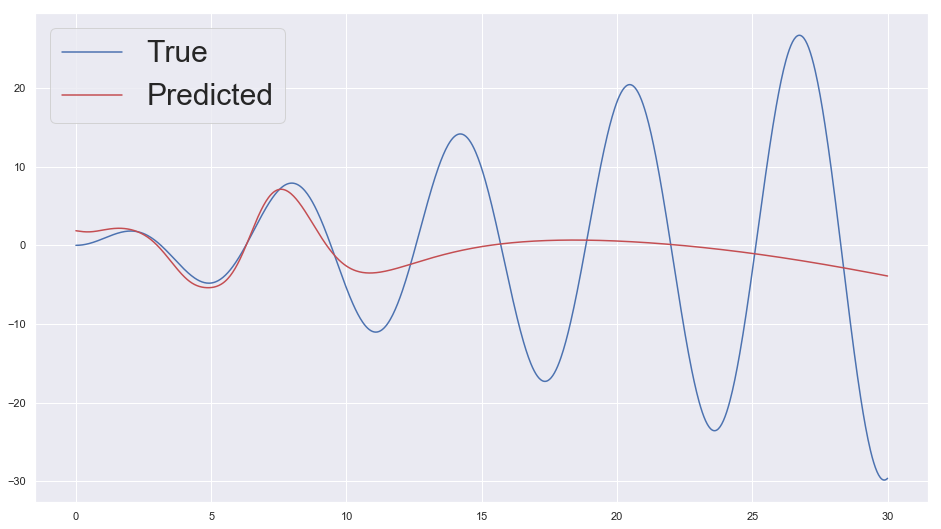

In [22]:
visualize_predictions(x_train, y_train, wide_model)

# Колбэки в keras как способ мониторить обучение

In [23]:
wide_history

In [24]:
wide_history.history.keys()

['mean_squared_error', 'loss']

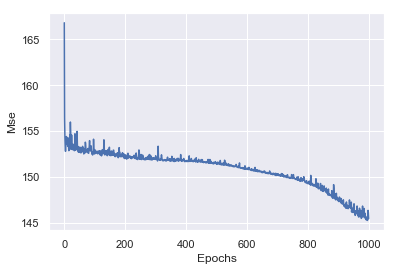

In [25]:
plt.plot(range(len(wide_history.history['loss'])), wide_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mse')
plt.show()

# Глубокая модель во всей своей красе

In [26]:
deep_model = create_deep_model([30,70])
deep_history = deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
1000/1000 [==============================] - 0s 252us/step - loss: 153.9927 - mean_squared_error: 153.9927
Epoch 2/1000
1000/1000 [==============================] - 0s 10us/step - loss: 153.2591 - mean_squared_error: 153.2591
Epoch 3/1000
1000/1000 [==============================] - 0s 9us/step - loss: 153.5945 - mean_squared_error: 153.5945
Epoch 4/1000
1000/1000 [==============================] - 0s 10us/step - loss: 153.1826 - mean_squared_error: 153.1826
Epoch 5/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.9708 - mean_squared_error: 152.9708
Epoch 6/1000
1000/1000 [==============================] - 0s 9us/step - loss: 152.8226 - mean_squared_error: 152.8226
Epoch 7/1000
1000/1000 [==============================] - 0s 9us/step - loss: 153.0403 - mean_squared_error: 153.0403
Epoch 8/1000
1000/1000 [==============================] - 0s 15us/step - loss: 152.8083 - mean_squared_error: 152.8083
Epoch 9/1000
1000/1000 [===========================

1000/1000 [==============================] - 0s 9us/step - loss: 152.2587 - mean_squared_error: 152.2587
Epoch 70/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.1051 - mean_squared_error: 152.1051
Epoch 71/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.1876 - mean_squared_error: 152.1876
Epoch 72/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.4128 - mean_squared_error: 152.4128
Epoch 73/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.5492 - mean_squared_error: 152.5492
Epoch 74/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.4902 - mean_squared_error: 152.4902
Epoch 75/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.1416 - mean_squared_error: 152.1416
Epoch 76/1000
1000/1000 [==============================] - 0s 10us/step - loss: 152.0526 - mean_squared_error: 152.0526
Epoch 77/1000
1000/1000 [==============================

1000/1000 [==============================] - 0s 11us/step - loss: 151.5225 - mean_squared_error: 151.5225
Epoch 138/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.6520 - mean_squared_error: 151.6520
Epoch 139/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.7147 - mean_squared_error: 151.7147
Epoch 140/1000
1000/1000 [==============================] - 0s 11us/step - loss: 151.5222 - mean_squared_error: 151.5222
Epoch 141/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.3075 - mean_squared_error: 151.3075
Epoch 142/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.5993 - mean_squared_error: 151.5993
Epoch 143/1000
1000/1000 [==============================] - 0s 9us/step - loss: 151.8596 - mean_squared_error: 151.8596
Epoch 144/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.3685 - mean_squared_error: 151.3685
Epoch 145/1000
1000/1000 [======================

Epoch 205/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.9194 - mean_squared_error: 150.9194
Epoch 206/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.9266 - mean_squared_error: 150.9266
Epoch 207/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.9539 - mean_squared_error: 150.9539
Epoch 208/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.0106 - mean_squared_error: 151.0106
Epoch 209/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.9472 - mean_squared_error: 150.9472
Epoch 210/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.9991 - mean_squared_error: 150.9991
Epoch 211/1000
1000/1000 [==============================] - 0s 10us/step - loss: 150.8380 - mean_squared_error: 150.8380
Epoch 212/1000
1000/1000 [==============================] - 0s 10us/step - loss: 151.0063 - mean_squared_error: 151.0063
Epoch 213/1000
1000/1000 [======

1000/1000 [==============================] - 0s 19us/step - loss: 149.7709 - mean_squared_error: 149.7709
Epoch 273/1000
1000/1000 [==============================] - 0s 16us/step - loss: 149.7725 - mean_squared_error: 149.7725
Epoch 274/1000
1000/1000 [==============================] - 0s 15us/step - loss: 149.5742 - mean_squared_error: 149.5742
Epoch 275/1000
1000/1000 [==============================] - 0s 20us/step - loss: 149.4807 - mean_squared_error: 149.4807
Epoch 276/1000
1000/1000 [==============================] - 0s 18us/step - loss: 149.5212 - mean_squared_error: 149.5212
Epoch 277/1000
1000/1000 [==============================] - 0s 22us/step - loss: 149.3264 - mean_squared_error: 149.3264
Epoch 278/1000
1000/1000 [==============================] - 0s 18us/step - loss: 149.2879 - mean_squared_error: 149.2879
Epoch 279/1000
1000/1000 [==============================] - 0s 17us/step - loss: 149.4366 - mean_squared_error: 149.4366
Epoch 280/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 14us/step - loss: 134.5053 - mean_squared_error: 134.5053
Epoch 340/1000
1000/1000 [==============================] - 0s 13us/step - loss: 134.1801 - mean_squared_error: 134.1801
Epoch 341/1000
1000/1000 [==============================] - ETA: 0s - loss: 151.4627 - mean_squared_error: 151.46 - 0s 12us/step - loss: 133.9809 - mean_squared_error: 133.9809
Epoch 342/1000
1000/1000 [==============================] - 0s 12us/step - loss: 133.7924 - mean_squared_error: 133.7924
Epoch 343/1000
1000/1000 [==============================] - 0s 14us/step - loss: 133.5138 - mean_squared_error: 133.5138
Epoch 344/1000
1000/1000 [==============================] - 0s 12us/step - loss: 133.6276 - mean_squared_error: 133.6276
Epoch 345/1000
1000/1000 [==============================] - 0s 12us/step - loss: 133.7928 - mean_squared_error: 133.7928
Epoch 346/1000
1000/1000 [==============================] - 0s 13us/step - loss: 133.8143 - mean_squared_error: 

1000/1000 [==============================] - 0s 16us/step - loss: 116.6085 - mean_squared_error: 116.6085
Epoch 406/1000
1000/1000 [==============================] - 0s 14us/step - loss: 116.5143 - mean_squared_error: 116.5143
Epoch 407/1000
1000/1000 [==============================] - 0s 13us/step - loss: 116.2617 - mean_squared_error: 116.2617
Epoch 408/1000
1000/1000 [==============================] - 0s 18us/step - loss: 116.2522 - mean_squared_error: 116.2522
Epoch 409/1000
1000/1000 [==============================] - 0s 17us/step - loss: 115.9553 - mean_squared_error: 115.9553
Epoch 410/1000
1000/1000 [==============================] - 0s 15us/step - loss: 115.8985 - mean_squared_error: 115.8985
Epoch 411/1000
1000/1000 [==============================] - ETA: 0s - loss: 116.6513 - mean_squared_error: 116.65 - 0s 14us/step - loss: 115.5998 - mean_squared_error: 115.5998
Epoch 412/1000
1000/1000 [==============================] - 0s 15us/step - loss: 115.3302 - mean_squared_error: 

1000/1000 [==============================] - 0s 14us/step - loss: 93.1940 - mean_squared_error: 93.1940
Epoch 473/1000
1000/1000 [==============================] - 0s 15us/step - loss: 92.9665 - mean_squared_error: 92.9665
Epoch 474/1000
1000/1000 [==============================] - 0s 13us/step - loss: 92.8010 - mean_squared_error: 92.8010
Epoch 475/1000
1000/1000 [==============================] - 0s 15us/step - loss: 92.8127 - mean_squared_error: 92.8127
Epoch 476/1000
1000/1000 [==============================] - 0s 13us/step - loss: 93.0876 - mean_squared_error: 93.0876
Epoch 477/1000
1000/1000 [==============================] - 0s 15us/step - loss: 95.4213 - mean_squared_error: 95.4213
Epoch 478/1000
1000/1000 [==============================] - 0s 14us/step - loss: 95.6564 - mean_squared_error: 95.6564
Epoch 479/1000
1000/1000 [==============================] - 0s 15us/step - loss: 93.3287 - mean_squared_error: 93.3287
Epoch 480/1000
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 10us/step - loss: 62.2134 - mean_squared_error: 62.2134
Epoch 542/1000
1000/1000 [==============================] - 0s 10us/step - loss: 61.7629 - mean_squared_error: 61.7629
Epoch 543/1000
1000/1000 [==============================] - 0s 10us/step - loss: 60.7740 - mean_squared_error: 60.7740
Epoch 544/1000
1000/1000 [==============================] - 0s 10us/step - loss: 61.7706 - mean_squared_error: 61.7706
Epoch 545/1000
1000/1000 [==============================] - 0s 10us/step - loss: 61.9127 - mean_squared_error: 61.9127
Epoch 546/1000
1000/1000 [==============================] - 0s 10us/step - loss: 62.0625 - mean_squared_error: 62.0625
Epoch 547/1000
1000/1000 [==============================] - 0s 10us/step - loss: 60.6453 - mean_squared_error: 60.6453
Epoch 548/1000
1000/1000 [==============================] - 0s 9us/step - loss: 57.8480 - mean_squared_error: 57.8480
Epoch 549/1000
1000/1000 [==============================] - 0s 9

1000/1000 [==============================] - 0s 10us/step - loss: 2.7928 - mean_squared_error: 2.7928
Epoch 611/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.4042 - mean_squared_error: 3.4042
Epoch 612/1000
1000/1000 [==============================] - 0s 10us/step - loss: 3.0749 - mean_squared_error: 3.0749
Epoch 613/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.4486 - mean_squared_error: 2.4486
Epoch 614/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.9835 - mean_squared_error: 2.9835
Epoch 615/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.4303 - mean_squared_error: 2.4303
Epoch 616/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.4003 - mean_squared_error: 2.4003
Epoch 617/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.4436 - mean_squared_error: 2.4436
Epoch 618/1000
1000/1000 [==============================] - 0s 10us/step - loss

1000/1000 [==============================] - 0s 12us/step - loss: 0.2768 - mean_squared_error: 0.2768
Epoch 681/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.2506 - mean_squared_error: 0.2506
Epoch 682/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.2942 - mean_squared_error: 0.2942
Epoch 683/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.3172 - mean_squared_error: 0.3172
Epoch 684/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.3137 - mean_squared_error: 0.3137
Epoch 685/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.2527 - mean_squared_error: 0.2527
Epoch 686/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.3459 - mean_squared_error: 0.3459
Epoch 687/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4291 - mean_squared_error: 0.4291
Epoch 688/1000
1000/1000 [==============================] - 0s 10us/step - loss

1000/1000 [==============================] - 0s 11us/step - loss: 0.2043 - mean_squared_error: 0.2043
Epoch 751/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 752/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 753/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.1280 - mean_squared_error: 0.1280
Epoch 754/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 755/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 756/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 757/1000
1000/1000 [==============================] - 0s 9us/step - loss: 0.1202 - mean_squared_error: 0.1202
Epoch 758/1000
1000/1000 [==============================] - 0s 10us/step - loss: 

1000/1000 [==============================] - 0s 10us/step - loss: 0.1269 - mean_squared_error: 0.1269
Epoch 821/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 822/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 823/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 824/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0788 - mean_squared_error: 0.0788
Epoch 825/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 826/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 827/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 828/1000
1000/1000 [==============================] - 0s 9us/step - loss:

1000/1000 [==============================] - 0s 12us/step - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 891/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 892/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 893/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 894/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 895/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 896/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 897/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 898/1000
1000/1000 [==============================] - 0s 13us/step - loss

1000/1000 [==============================] - 0s 10us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 961/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 962/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6247 - mean_squared_error: 0.6247
Epoch 963/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.3309 - mean_squared_error: 0.3309
Epoch 964/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.1707 - mean_squared_error: 0.1707
Epoch 965/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 966/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 967/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 968/1000
1000/1000 [==============================] - 0s 10us/step - loss

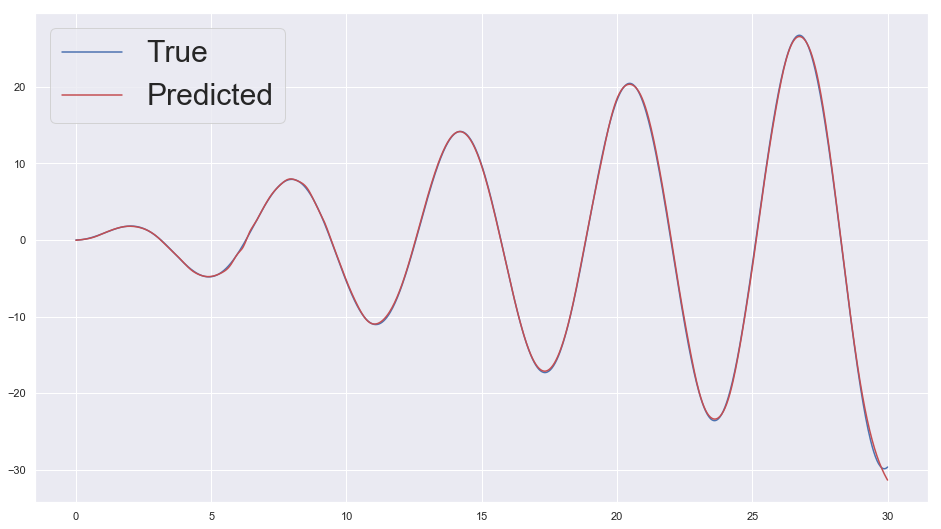

In [27]:
visualize_predictions(x_train, y_train, deep_model)

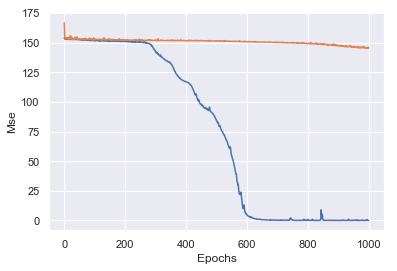

In [28]:
plt.plot(range(len(deep_history.history['loss'])), deep_history.history['loss'])
plt.plot(range(len(wide_history.history['loss'])), wide_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mse')
plt.show()

# Самые разные сложности с архитектурой

In [29]:
x_train, y_train = create_data(-30, 30, 2000, x_sin)
deep_model = create_deep_model([30,70])
deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
2000/2000 [==============================] - 0s 155us/step - loss: 153.5978 - mean_squared_error: 153.5978
Epoch 2/1000
2000/2000 [==============================] - 0s 9us/step - loss: 154.0882 - mean_squared_error: 154.0882
Epoch 3/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.2959 - mean_squared_error: 153.2959
Epoch 4/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.1647 - mean_squared_error: 153.1647
Epoch 5/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.9486 - mean_squared_error: 152.9486
Epoch 6/1000
2000/2000 [==============================] - 0s 10us/step - loss: 153.0917 - mean_squared_error: 153.0917
Epoch 7/1000
2000/2000 [==============================] - 0s 9us/step - loss: 153.1033 - mean_squared_error: 153.1033
Epoch 8/1000
2000/2000 [==============================] - 0s 9us/step - loss: 153.1570 - mean_squared_error: 153.1570
Epoch 9/1000
2000/2000 [===========================

2000/2000 [==============================] - 0s 9us/step - loss: 152.8786 - mean_squared_error: 152.8786
Epoch 70/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7977 - mean_squared_error: 152.7977
Epoch 71/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.9807 - mean_squared_error: 152.9807
Epoch 72/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8575 - mean_squared_error: 152.8575
Epoch 73/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8579 - mean_squared_error: 152.8579
Epoch 74/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8074 - mean_squared_error: 152.8074
Epoch 75/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8932 - mean_squared_error: 152.8932
Epoch 76/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8837 - mean_squared_error: 152.8837
Epoch 77/1000
2000/2000 [==============================] - 0s

2000/2000 [==============================] - 0s 9us/step - loss: 152.7027 - mean_squared_error: 152.7027
Epoch 138/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5944 - mean_squared_error: 152.5944
Epoch 139/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6559 - mean_squared_error: 152.6559
Epoch 140/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6863 - mean_squared_error: 152.6863
Epoch 141/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8722 - mean_squared_error: 152.8722
Epoch 142/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7164 - mean_squared_error: 152.7164
Epoch 143/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.8985 - mean_squared_error: 152.8985
Epoch 144/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5772 - mean_squared_error: 152.5772
Epoch 145/1000
2000/2000 [===========================

2000/2000 [==============================] - 0s 9us/step - loss: 152.7022 - mean_squared_error: 152.7022
Epoch 206/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5484 - mean_squared_error: 152.5484
Epoch 207/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5697 - mean_squared_error: 152.5697
Epoch 208/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5244 - mean_squared_error: 152.5244
Epoch 209/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4554 - mean_squared_error: 152.4554
Epoch 210/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.4148 - mean_squared_error: 152.4148
Epoch 211/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6318 - mean_squared_error: 152.6318
Epoch 212/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.3830 - mean_squared_error: 152.3830
Epoch 213/1000
2000/2000 [============================

2000/2000 [==============================] - 0s 11us/step - loss: 152.4264 - mean_squared_error: 152.4264
Epoch 274/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.3642 - mean_squared_error: 152.3642
Epoch 275/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.2500 - mean_squared_error: 152.2500
Epoch 276/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.3355 - mean_squared_error: 152.3355
Epoch 277/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4243 - mean_squared_error: 152.4243
Epoch 278/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6752 - mean_squared_error: 152.6752
Epoch 279/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5924 - mean_squared_error: 152.5924
Epoch 280/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7590 - mean_squared_error: 152.7590
Epoch 281/1000
2000/2000 [===========================

2000/2000 [==============================] - 0s 9us/step - loss: 151.8202 - mean_squared_error: 151.8202
Epoch 341/1000
2000/2000 [==============================] - 0s 8us/step - loss: 152.3528 - mean_squared_error: 152.3528
Epoch 342/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4165 - mean_squared_error: 152.4165
Epoch 343/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.8692 - mean_squared_error: 151.8692
Epoch 344/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.4364 - mean_squared_error: 152.4364
Epoch 345/1000
2000/2000 [==============================] - 0s 9us/step - loss: 153.1466 - mean_squared_error: 153.1466
Epoch 346/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7347 - mean_squared_error: 152.7347
Epoch 347/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7443 - mean_squared_error: 152.7443
Epoch 348/1000
2000/2000 [=============================

2000/2000 [==============================] - 0s 9us/step - loss: 152.6731 - mean_squared_error: 152.6731
Epoch 409/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5998 - mean_squared_error: 152.5998
Epoch 410/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.9003 - mean_squared_error: 151.9003
Epoch 411/1000
2000/2000 [==============================] - 0s 9us/step - loss: 151.2457 - mean_squared_error: 151.2457
Epoch 412/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.1433 - mean_squared_error: 152.1433
Epoch 413/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6977 - mean_squared_error: 152.6977
Epoch 414/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6845 - mean_squared_error: 152.6845
Epoch 415/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6922 - mean_squared_error: 152.6922
Epoch 416/1000
2000/2000 [=============================

2000/2000 [==============================] - 0s 9us/step - loss: 152.7845 - mean_squared_error: 152.7845
Epoch 477/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7873 - mean_squared_error: 152.7873
Epoch 478/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7175 - mean_squared_error: 152.7175
Epoch 479/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7146 - mean_squared_error: 152.7146
Epoch 480/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.7041 - mean_squared_error: 152.7041
Epoch 481/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.7278 - mean_squared_error: 152.7278
Epoch 482/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6982 - mean_squared_error: 152.6982
Epoch 483/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6926 - mean_squared_error: 152.6926
Epoch 484/1000
2000/2000 [==========================

2000/2000 [==============================] - 0s 10us/step - loss: 152.6931 - mean_squared_error: 152.6931
Epoch 545/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6597 - mean_squared_error: 152.6597
Epoch 546/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6689 - mean_squared_error: 152.6689
Epoch 547/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.6923 - mean_squared_error: 152.6923
Epoch 548/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.6929 - mean_squared_error: 152.6929
Epoch 549/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7274 - mean_squared_error: 152.7274
Epoch 550/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.7080 - mean_squared_error: 152.7080
Epoch 551/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.6867 - mean_squared_error: 152.6867
Epoch 552/1000
2000/2000 [======================

Epoch 612/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6639 - mean_squared_error: 152.6639
Epoch 613/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6808 - mean_squared_error: 152.6808
Epoch 614/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6254 - mean_squared_error: 152.6254
Epoch 615/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.6277 - mean_squared_error: 152.6277
Epoch 616/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5957 - mean_squared_error: 152.5957
Epoch 617/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5741 - mean_squared_error: 152.5741
Epoch 618/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.5368 - mean_squared_error: 152.5368
Epoch 619/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.0483 - mean_squared_error: 152.0483
Epoch 620/1000
2000/2000 [==============

2000/2000 [==============================] - 0s 10us/step - loss: 152.4526 - mean_squared_error: 152.4526
Epoch 681/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.2841 - mean_squared_error: 152.2841
Epoch 682/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.0078 - mean_squared_error: 152.0078
Epoch 683/1000
2000/2000 [==============================] - 0s 9us/step - loss: 150.9634 - mean_squared_error: 150.9634
Epoch 684/1000
2000/2000 [==============================] - 0s 9us/step - loss: 150.3745 - mean_squared_error: 150.3745
Epoch 685/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.2035 - mean_squared_error: 152.2035
Epoch 686/1000
2000/2000 [==============================] - 0s 9us/step - loss: 150.6904 - mean_squared_error: 150.6904
Epoch 687/1000
2000/2000 [==============================] - 0s 9us/step - loss: 147.9051 - mean_squared_error: 147.9051
Epoch 688/1000
2000/2000 [============================

2000/2000 [==============================] - 0s 10us/step - loss: 150.2862 - mean_squared_error: 150.2862
Epoch 749/1000
2000/2000 [==============================] - 0s 10us/step - loss: 148.9276 - mean_squared_error: 148.9276
Epoch 750/1000
2000/2000 [==============================] - 0s 11us/step - loss: 147.6376 - mean_squared_error: 147.6376
Epoch 751/1000
2000/2000 [==============================] - 0s 11us/step - loss: 146.1393 - mean_squared_error: 146.1393
Epoch 752/1000
2000/2000 [==============================] - 0s 10us/step - loss: 145.5823 - mean_squared_error: 145.5823
Epoch 753/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.4390 - mean_squared_error: 152.4390
Epoch 754/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.1920 - mean_squared_error: 152.1920
Epoch 755/1000
2000/2000 [==============================] - 0s 9us/step - loss: 152.2416 - mean_squared_error: 152.2416
Epoch 756/1000
2000/2000 [=======================

2000/2000 [==============================] - 0s 15us/step - loss: 148.4736 - mean_squared_error: 148.4736
Epoch 817/1000
2000/2000 [==============================] - 0s 12us/step - loss: 147.6440 - mean_squared_error: 147.6440
Epoch 818/1000
2000/2000 [==============================] - 0s 12us/step - loss: 146.9835 - mean_squared_error: 146.9835
Epoch 819/1000
2000/2000 [==============================] - 0s 14us/step - loss: 148.4007 - mean_squared_error: 148.4007
Epoch 820/1000
2000/2000 [==============================] - 0s 14us/step - loss: 146.5827 - mean_squared_error: 146.5827
Epoch 821/1000
2000/2000 [==============================] - 0s 13us/step - loss: 147.1592 - mean_squared_error: 147.1592
Epoch 822/1000
2000/2000 [==============================] - 0s 11us/step - loss: 146.6008 - mean_squared_error: 146.6008
Epoch 823/1000
2000/2000 [==============================] - 0s 12us/step - loss: 145.3920 - mean_squared_error: 145.3920
Epoch 824/1000
2000/2000 [=====================

Epoch 884/1000
2000/2000 [==============================] - 0s 12us/step - loss: 82.3293 - mean_squared_error: 82.3293
Epoch 885/1000
2000/2000 [==============================] - 0s 13us/step - loss: 80.8372 - mean_squared_error: 80.8372
Epoch 886/1000
2000/2000 [==============================] - 0s 12us/step - loss: 80.5100 - mean_squared_error: 80.5100
Epoch 887/1000
2000/2000 [==============================] - 0s 12us/step - loss: 83.2108 - mean_squared_error: 83.2108
Epoch 888/1000
2000/2000 [==============================] - 0s 12us/step - loss: 78.0201 - mean_squared_error: 78.0201
Epoch 889/1000
2000/2000 [==============================] - 0s 11us/step - loss: 76.3181 - mean_squared_error: 76.3181
Epoch 890/1000
2000/2000 [==============================] - 0s 13us/step - loss: 76.0511 - mean_squared_error: 76.0511
Epoch 891/1000
2000/2000 [==============================] - 0s 11us/step - loss: 75.3003 - mean_squared_error: 75.3003
Epoch 892/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 11us/step - loss: 58.2043 - mean_squared_error: 58.2043
Epoch 953/1000
2000/2000 [==============================] - 0s 11us/step - loss: 58.2167 - mean_squared_error: 58.2167
Epoch 954/1000
2000/2000 [==============================] - 0s 11us/step - loss: 58.5222 - mean_squared_error: 58.5222
Epoch 955/1000
2000/2000 [==============================] - 0s 12us/step - loss: 58.5525 - mean_squared_error: 58.5525
Epoch 956/1000
2000/2000 [==============================] - 0s 11us/step - loss: 60.0809 - mean_squared_error: 60.0809
Epoch 957/1000
2000/2000 [==============================] - 0s 11us/step - loss: 58.4399 - mean_squared_error: 58.4399
Epoch 958/1000
2000/2000 [==============================] - 0s 11us/step - loss: 57.9851 - mean_squared_error: 57.9851
Epoch 959/1000
2000/2000 [==============================] - 0s 11us/step - loss: 57.7357 - mean_squared_error: 57.7357
Epoch 960/1000
2000/2000 [==============================] - 0s 

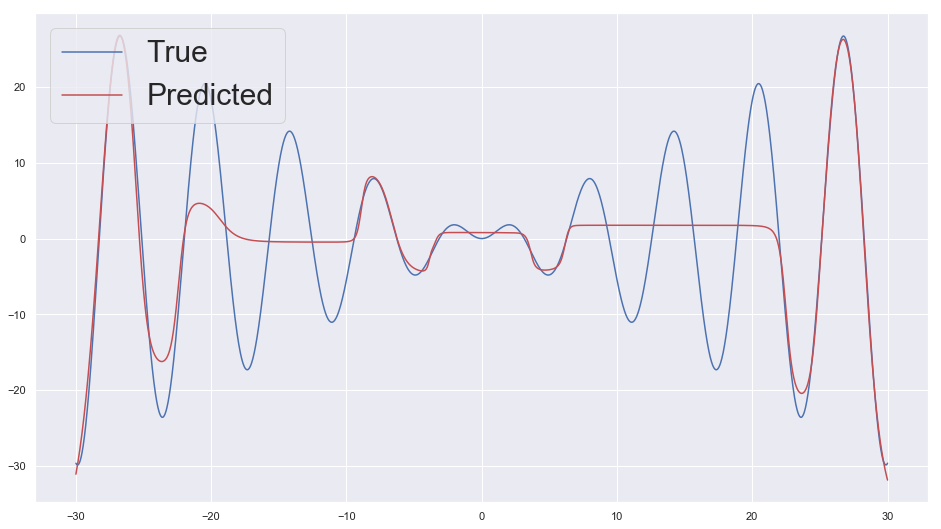

In [30]:
visualize_predictions(x_train, y_train, deep_model)

In [31]:
x_train, y_train = create_data(-30, 30, 2000, x_sin)
deep_model = create_deep_model([128,64,64])
deep_model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
2000/2000 [==============================] - 0s 178us/step - loss: 153.3388 - mean_squared_error: 153.3388
Epoch 2/1000
2000/2000 [==============================] - 0s 17us/step - loss: 153.1531 - mean_squared_error: 153.1531
Epoch 3/1000
2000/2000 [==============================] - 0s 17us/step - loss: 153.0023 - mean_squared_error: 153.0023
Epoch 4/1000
2000/2000 [==============================] - 0s 16us/step - loss: 152.9373 - mean_squared_error: 152.9373
Epoch 5/1000
2000/2000 [==============================] - 0s 16us/step - loss: 153.0939 - mean_squared_error: 153.0939
Epoch 6/1000
2000/2000 [==============================] - 0s 16us/step - loss: 153.3106 - mean_squared_error: 153.3106
Epoch 7/1000
2000/2000 [==============================] - 0s 15us/step - loss: 153.0165 - mean_squared_error: 153.0165
Epoch 8/1000
2000/2000 [==============================] - 0s 16us/step - loss: 152.9802 - mean_squared_error: 152.9802
Epoch 9/1000
2000/2000 [=======================

2000/2000 [==============================] - 0s 11us/step - loss: 152.8273 - mean_squared_error: 152.8273
Epoch 70/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.8260 - mean_squared_error: 152.8260
Epoch 71/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.8601 - mean_squared_error: 152.8601
Epoch 72/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.8824 - mean_squared_error: 152.8824
Epoch 73/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.8296 - mean_squared_error: 152.8296
Epoch 74/1000
2000/2000 [==============================] - 0s 10us/step - loss: 152.9273 - mean_squared_error: 152.9273
Epoch 75/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.8508 - mean_squared_error: 152.8508
Epoch 76/1000
2000/2000 [==============================] - 0s 11us/step - loss: 152.8925 - mean_squared_error: 152.8925
Epoch 77/1000
2000/2000 [=============================

2000/2000 [==============================] - 0s 11us/step - loss: 148.4292 - mean_squared_error: 148.4292
Epoch 138/1000
2000/2000 [==============================] - 0s 12us/step - loss: 147.7418 - mean_squared_error: 147.7418
Epoch 139/1000
2000/2000 [==============================] - 0s 10us/step - loss: 147.0207 - mean_squared_error: 147.0207
Epoch 140/1000
2000/2000 [==============================] - 0s 11us/step - loss: 146.4204 - mean_squared_error: 146.4204
Epoch 141/1000
2000/2000 [==============================] - 0s 11us/step - loss: 145.4887 - mean_squared_error: 145.4887
Epoch 142/1000
2000/2000 [==============================] - 0s 11us/step - loss: 145.0321 - mean_squared_error: 145.0321
Epoch 143/1000
2000/2000 [==============================] - 0s 11us/step - loss: 145.0809 - mean_squared_error: 145.0809
Epoch 144/1000
2000/2000 [==============================] - 0s 11us/step - loss: 147.9089 - mean_squared_error: 147.9089
Epoch 145/1000
2000/2000 [=====================

2000/2000 [==============================] - 0s 10us/step - loss: 125.2794 - mean_squared_error: 125.2794
Epoch 205/1000
2000/2000 [==============================] - 0s 10us/step - loss: 125.1653 - mean_squared_error: 125.1653
Epoch 206/1000
2000/2000 [==============================] - 0s 10us/step - loss: 125.1068 - mean_squared_error: 125.1068
Epoch 207/1000
2000/2000 [==============================] - 0s 10us/step - loss: 125.0362 - mean_squared_error: 125.0362
Epoch 208/1000
2000/2000 [==============================] - 0s 10us/step - loss: 124.7733 - mean_squared_error: 124.7733
Epoch 209/1000
2000/2000 [==============================] - 0s 11us/step - loss: 124.7112 - mean_squared_error: 124.7112
Epoch 210/1000
2000/2000 [==============================] - 0s 10us/step - loss: 124.8135 - mean_squared_error: 124.8135
Epoch 211/1000
2000/2000 [==============================] - 0s 10us/step - loss: 125.0537 - mean_squared_error: 125.0537
Epoch 212/1000
2000/2000 [=====================

2000/2000 [==============================] - 0s 10us/step - loss: 99.4560 - mean_squared_error: 99.4560
Epoch 272/1000
2000/2000 [==============================] - 0s 11us/step - loss: 99.8386 - mean_squared_error: 99.8386
Epoch 273/1000
2000/2000 [==============================] - 0s 10us/step - loss: 99.5946 - mean_squared_error: 99.5946
Epoch 274/1000
2000/2000 [==============================] - 0s 11us/step - loss: 98.7739 - mean_squared_error: 98.7739
Epoch 275/1000
2000/2000 [==============================] - 0s 10us/step - loss: 98.2720 - mean_squared_error: 98.2720
Epoch 276/1000
2000/2000 [==============================] - 0s 10us/step - loss: 98.0271 - mean_squared_error: 98.0271
Epoch 277/1000
2000/2000 [==============================] - 0s 10us/step - loss: 98.7779 - mean_squared_error: 98.7779
Epoch 278/1000
2000/2000 [==============================] - 0s 10us/step - loss: 99.1704 - mean_squared_error: 99.1704
Epoch 279/1000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 14us/step - loss: 83.3334 - mean_squared_error: 83.3334
Epoch 340/1000
2000/2000 [==============================] - 0s 14us/step - loss: 83.6029 - mean_squared_error: 83.6029
Epoch 341/1000
2000/2000 [==============================] - 0s 13us/step - loss: 83.0027 - mean_squared_error: 83.0027
Epoch 342/1000
2000/2000 [==============================] - 0s 14us/step - loss: 83.0644 - mean_squared_error: 83.0644
Epoch 343/1000
2000/2000 [==============================] - 0s 13us/step - loss: 82.7490 - mean_squared_error: 82.7490
Epoch 344/1000
2000/2000 [==============================] - 0s 14us/step - loss: 83.3630 - mean_squared_error: 83.3630
Epoch 345/1000
2000/2000 [==============================] - 0s 13us/step - loss: 84.8270 - mean_squared_error: 84.8270
Epoch 346/1000
2000/2000 [==============================] - 0s 13us/step - loss: 84.6899 - mean_squared_error: 84.6899
Epoch 347/1000
2000/2000 [==============================] - 0s 

Epoch 408/1000
2000/2000 [==============================] - 0s 10us/step - loss: 83.0953 - mean_squared_error: 83.0953
Epoch 409/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.2538 - mean_squared_error: 82.2538
Epoch 410/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.0623 - mean_squared_error: 82.0623
Epoch 411/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.1561 - mean_squared_error: 82.1561
Epoch 412/1000
2000/2000 [==============================] - 0s 10us/step - loss: 82.3021 - mean_squared_error: 82.3021
Epoch 413/1000
2000/2000 [==============================] - 0s 11us/step - loss: 82.1856 - mean_squared_error: 82.1856
Epoch 414/1000
2000/2000 [==============================] - ETA: 0s - loss: 75.9764 - mean_squared_error: 75.97 - 0s 11us/step - loss: 82.0574 - mean_squared_error: 82.0574
Epoch 415/1000
2000/2000 [==============================] - 0s 11us/step - loss: 82.0767 - mean_squared_error: 82

2000/2000 [==============================] - 0s 10us/step - loss: 79.3967 - mean_squared_error: 79.3967
Epoch 477/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.2174 - mean_squared_error: 79.2174
Epoch 478/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.3705 - mean_squared_error: 79.3705
Epoch 479/1000
2000/2000 [==============================] - 0s 12us/step - loss: 79.1916 - mean_squared_error: 79.1916
Epoch 480/1000
2000/2000 [==============================] - 0s 12us/step - loss: 79.1477 - mean_squared_error: 79.1477
Epoch 481/1000
2000/2000 [==============================] - 0s 12us/step - loss: 79.1321 - mean_squared_error: 79.1321
Epoch 482/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.1199 - mean_squared_error: 79.1199
Epoch 483/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.2233 - mean_squared_error: 79.2233
Epoch 484/1000
2000/2000 [==============================] - 0s 

Epoch 545/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.0335 - mean_squared_error: 79.0335
Epoch 546/1000
2000/2000 [==============================] - 0s 11us/step - loss: 78.9539 - mean_squared_error: 78.9539
Epoch 547/1000
2000/2000 [==============================] - 0s 13us/step - loss: 79.1981 - mean_squared_error: 79.1981
Epoch 548/1000
2000/2000 [==============================] - 0s 14us/step - loss: 79.0008 - mean_squared_error: 79.0008
Epoch 549/1000
2000/2000 [==============================] - 0s 13us/step - loss: 78.9680 - mean_squared_error: 78.9680
Epoch 550/1000
2000/2000 [==============================] - 0s 11us/step - loss: 78.9963 - mean_squared_error: 78.9963
Epoch 551/1000
2000/2000 [==============================] - 0s 12us/step - loss: 78.9405 - mean_squared_error: 78.9405
Epoch 552/1000
2000/2000 [==============================] - 0s 11us/step - loss: 78.8985 - mean_squared_error: 78.8985
Epoch 553/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 12us/step - loss: 78.8485 - mean_squared_error: 78.8485
Epoch 614/1000
2000/2000 [==============================] - 0s 12us/step - loss: 78.8663 - mean_squared_error: 78.8663
Epoch 615/1000
2000/2000 [==============================] - 0s 13us/step - loss: 78.8475 - mean_squared_error: 78.8475
Epoch 616/1000
2000/2000 [==============================] - 0s 12us/step - loss: 78.8707 - mean_squared_error: 78.8707
Epoch 617/1000
2000/2000 [==============================] - 0s 11us/step - loss: 78.8665 - mean_squared_error: 78.8665
Epoch 618/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.0010 - mean_squared_error: 79.0010
Epoch 619/1000
2000/2000 [==============================] - 0s 11us/step - loss: 79.1933 - mean_squared_error: 79.1933
Epoch 620/1000
2000/2000 [==============================] - 0s 10us/step - loss: 78.9008 - mean_squared_error: 78.9008
Epoch 621/1000
2000/2000 [==============================] - 0s 

Epoch 682/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.8454 - mean_squared_error: 77.8454
Epoch 683/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.8250 - mean_squared_error: 77.8250
Epoch 684/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.5035 - mean_squared_error: 77.5035
Epoch 685/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.5321 - mean_squared_error: 77.5321
Epoch 686/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.3821 - mean_squared_error: 77.3821
Epoch 687/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.3679 - mean_squared_error: 77.3679
Epoch 688/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.4833 - mean_squared_error: 77.4833
Epoch 689/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.9249 - mean_squared_error: 77.9249
Epoch 690/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 11us/step - loss: 77.1537 - mean_squared_error: 77.1537
Epoch 751/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1848 - mean_squared_error: 77.1848
Epoch 752/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.1432 - mean_squared_error: 77.1432
Epoch 753/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.2662 - mean_squared_error: 77.2662
Epoch 754/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.3008 - mean_squared_error: 77.3008
Epoch 755/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.5279 - mean_squared_error: 77.5279
Epoch 756/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.3652 - mean_squared_error: 77.3652
Epoch 757/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.2960 - mean_squared_error: 77.2960
Epoch 758/1000
2000/2000 [==============================] - 0s 

Epoch 819/1000
2000/2000 [==============================] - 0s 12us/step - loss: 77.2600 - mean_squared_error: 77.2600
Epoch 820/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1663 - mean_squared_error: 77.1663
Epoch 821/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.2227 - mean_squared_error: 77.2227
Epoch 822/1000
2000/2000 [==============================] - 0s 13us/step - loss: 77.2254 - mean_squared_error: 77.2254
Epoch 823/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1687 - mean_squared_error: 77.1687
Epoch 824/1000
2000/2000 [==============================] - 0s 12us/step - loss: 77.1333 - mean_squared_error: 77.1333
Epoch 825/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1752 - mean_squared_error: 77.1752
Epoch 826/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1154 - mean_squared_error: 77.1154
Epoch 827/1000
2000/2000 [======================

2000/2000 [==============================] - 0s 11us/step - loss: 77.2965 - mean_squared_error: 77.2965
Epoch 888/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.3024 - mean_squared_error: 77.3024
Epoch 889/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.1626 - mean_squared_error: 77.1626
Epoch 890/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.2412 - mean_squared_error: 77.2412
Epoch 891/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.4065 - mean_squared_error: 77.4065
Epoch 892/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.6290 - mean_squared_error: 77.6290
Epoch 893/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.4823 - mean_squared_error: 77.4823
Epoch 894/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.3533 - mean_squared_error: 77.3533
Epoch 895/1000
2000/2000 [==============================] - 0s 

Epoch 956/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.2712 - mean_squared_error: 77.2712
Epoch 957/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1764 - mean_squared_error: 77.1764
Epoch 958/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.3000 - mean_squared_error: 77.3000
Epoch 959/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.2185 - mean_squared_error: 77.2185
Epoch 960/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.2214 - mean_squared_error: 77.2214
Epoch 961/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.4385 - mean_squared_error: 77.4385
Epoch 962/1000
2000/2000 [==============================] - 0s 11us/step - loss: 77.1286 - mean_squared_error: 77.1286
Epoch 963/1000
2000/2000 [==============================] - 0s 10us/step - loss: 77.1712 - mean_squared_error: 77.1712
Epoch 964/1000
2000/2000 [======================

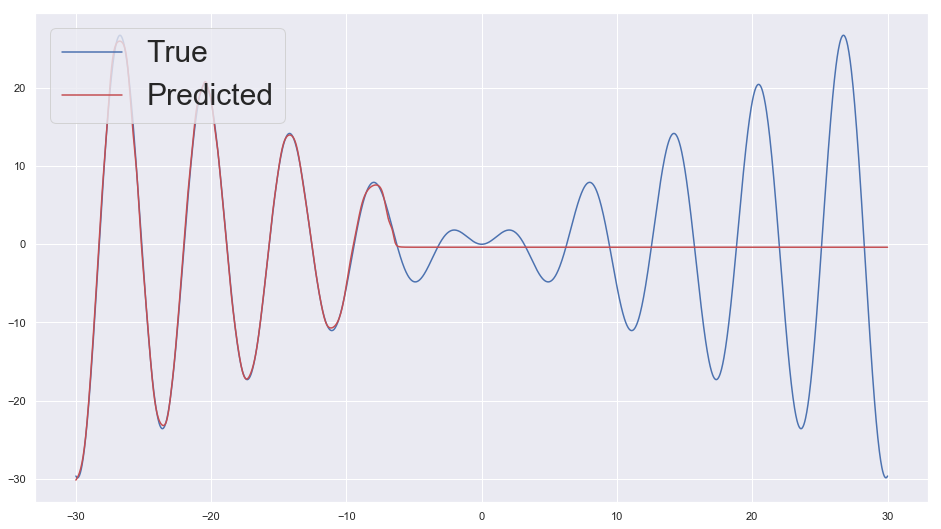

In [32]:
visualize_predictions(x_train, y_train, deep_model)

# 